In [10]:
import pandas as pd
import numpy as np
import pylab 
import matplotlib.pyplot as plt
from collections import Counter
import re
import itertools
import gc
#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] = [20, 5]

In [11]:
data =  pd.read_csv ('ETHUSDT.csv')
# data = pd.read_csv ('BTCUSDT.csv')
data.head()

,Open Time,Open Time.1,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-17,2017-08-17 00:00:00.000000000,301.13,312.18,298.00,302.00,7030.71034,2017-08-17 23:59:59.999000064,2.154655e+06,4522,6224.58999,1.908705e+06,50579.872288
1,2017-08-18,2017-08-18 00:00:00.000000000,302.00,311.79,283.94,293.96,9537.84646,2017-08-18 23:59:59.999000064,2.858947e+06,5658,7452.43542,2.240813e+06,55329.574324
2,2017-08-19,2017-08-19 00:00:00.000000000,293.31,299.90,278.00,290.91,2146.19773,2017-08-19 23:59:59.999000064,6.200226e+05,1795,1537.97550,4.447136e+05,58005.171046
3,2017-08-20,2017-08-20 00:00:00.000000000,289.41,300.53,282.85,299.10,2510.13871,2017-08-20 23:59:59.999000064,7.428479e+05,2038,2186.68739,6.475061e+05,60299.066154
4,2017-08-21,2017-08-21 00:00:00.000000000,299.10,346.52,294.60,323.29,5219.44542,2017-08-21 23:59:59.999000064,1.689472e+06,3925,4004.19967,1.297977e+06,66203.840222


In [12]:
def data_clean(data):
    data['Change_close'] = data['Close'].pct_change()
#     data['Change_close'] = data['Close'].diff()
    data['Norm_Change_close']=(data['Change_close']-data['Change_close'].min())/(data['Change_close'].max()-
                                                                                 data['Change_close'].min())
    # Cleaning Train data
    train = data.head(1780)    
    train = train[['Close Time','Close','Change_close','Norm_Change_close']]
    train['Change_close'] = train['Change_close'].fillna(0)
    train['Date'] = train['Close Time'].str[:10]
    train['Date']= pd.to_datetime(train['Date'])
    
    train = train.drop(['Close Time'], axis=1)


    #Cleaning test data
    test = data.tail(20)
    test = test[['Close Time','Close','Change_close','Norm_Change_close']]
    test['Date'] = test['Close Time'].str[:10]
    test['Date']= pd.to_datetime(test['Date'])
    test = test.drop(['Close Time'], axis=1)
    
    
    
    return train,test
    

In [4]:
def plot_train(train):
    
    plot_data = train['Close']
    Date1 = train['Date']
    train1 = train[['Date','Close']]
    # Setting the Date as Index
    train2 = train1.set_index('Date')
    print (type(train2))
    print (train2.head())
    plt.plot(train2)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    plt.title("Closing price distribution of ETH", fontsize=15)
    plt.xticks(np.arange(0, len(Date1)+1, 50),rotation = 45)
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(1)
    plt.show()
    
    
    plot_data = train['Change_close']
    Date1 = train['Date']
    train1 = train[['Date','Change_close']]
    # Setting the Date as Index
    train2 = train1.set_index('Date')
    print (type(train2))
    print (train2.head())
    plt.plot(train2)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Change in Price', fontsize=12)
    plt.title("Closing price distribution of ETH", fontsize=15)
    plt.xticks(np.arange(0, len(Date1)+1, 50),rotation = 45)
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(1)
    plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [6]:
train,test = data_clean(data)

In [7]:
train.head()

,Close,Change_close,Norm_Change_close,Date
0,302.00,0.000000,NaN,2017-08-17
1,293.96,-0.026623,0.591213,2017-08-18
2,290.91,-0.010376,0.614119,2017-08-19
3,299.10,0.028153,0.668438,2017-08-20
4,323.29,0.080876,0.742770,2017-08-21


<class 'pandas.core.frame.DataFrame'>
             Close
Date              
2017-08-17  302.00
2017-08-18  293.96
2017-08-19  290.91
2017-08-20  299.10
2017-08-21  323.29


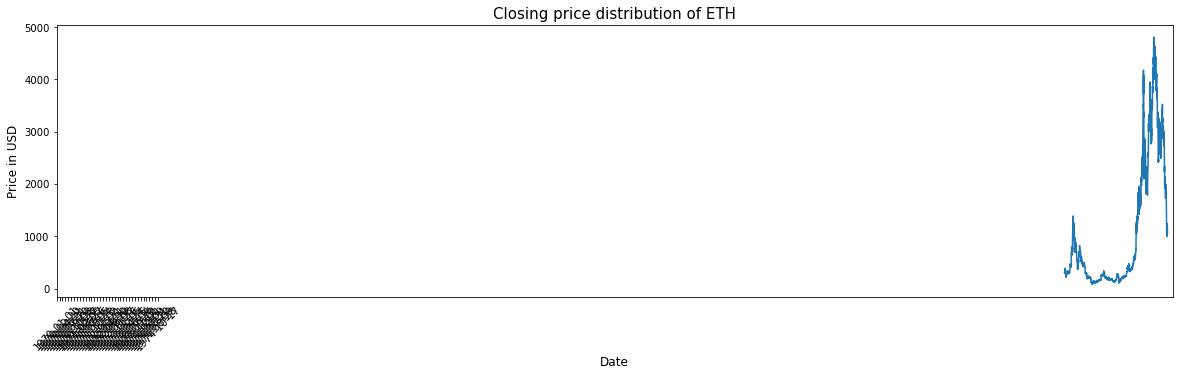

<Figure size 720x72 with 0 Axes>

<class 'pandas.core.frame.DataFrame'>
            Change_close
Date                    
2017-08-17      0.000000
2017-08-18     -0.026623
2017-08-19     -0.010376
2017-08-20      0.028153
2017-08-21      0.080876


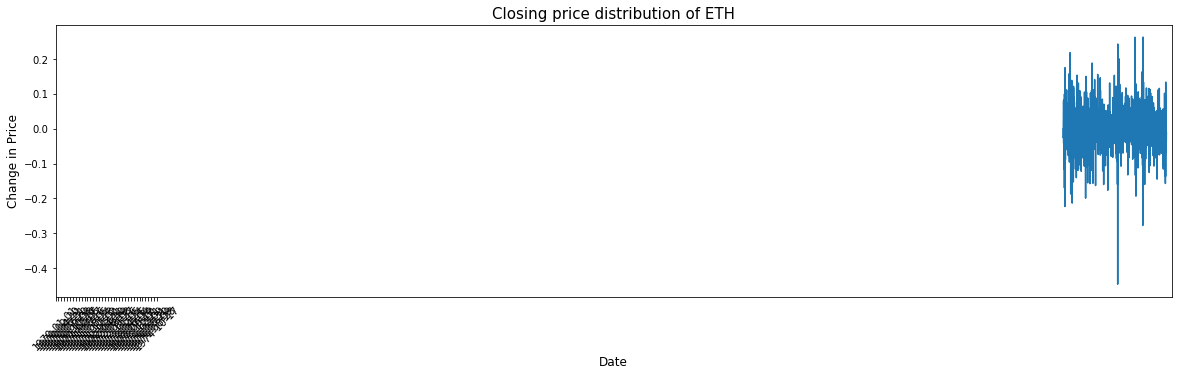

<Figure size 720x72 with 0 Axes>

In [8]:
plot_train(train)

In [9]:
train = train.set_index('Date')

In [9]:
train.head()

,Close,Change_close,Norm_Change_close
Date,,,
2017-08-17,302.00,0.000000,NaN
2017-08-18,293.96,-0.026623,0.591213
2017-08-19,290.91,-0.010376,0.614119
2017-08-20,299.10,0.028153,0.668438
2017-08-21,323.29,0.080876,0.742770


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


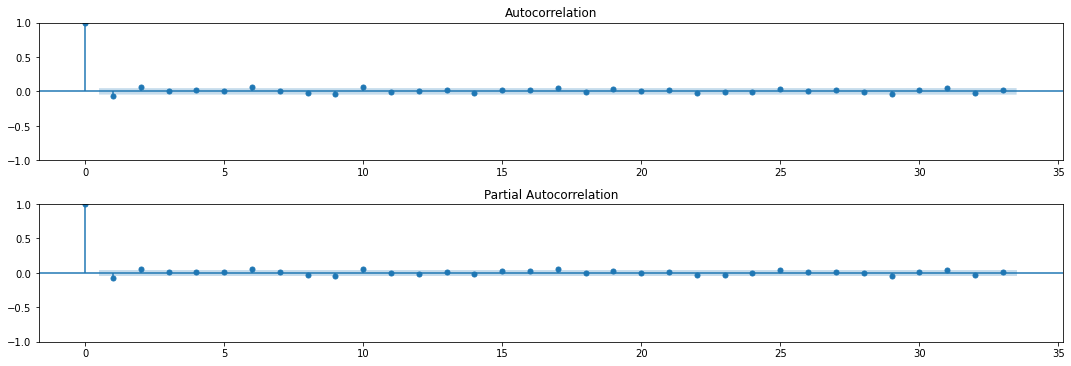

In [10]:
ax, fig = plt.subplots(figsize=(15,10))

plt.subplot(411)
x = sm.graphics.tsa.plot_acf(train['Change_close'], ax=plt.gca())
plt.subplot(412)
y = sm.graphics.tsa.plot_pacf(train['Change_close'],ax=plt.gca())
plt.tight_layout()



In [11]:
#-------SARIMAX-------#

#Constructs all possible parameter combinations.
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [12]:
def sarimax_function(data,pdq,s_pdq):

    result_list = []
    for param in pdq:
        for s_param in s_pdq:

            model = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=s_param,
            enforce_invertibility=False,enforce_stationarity=False)

            results = model.fit()
            result_list.append([param,s_param,results.aic])
            print("ARIMA Parameters: {} x: {}. AIC: {}".format(param,s_param,results.aic))

    return result_list,results

In [16]:
result_list,results = sarimax_function(train['Change_close'],pdq,seasonal_pdq)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.52397D+00    |proj g|=  7.06294D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     17      1     0     0   3.254D-04  -1.524D+00
  F =  -1.5239725952180290     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 0) x: (0, 0, 0, 12). AIC: -5423.342438976183
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0    

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so 


At iterate   10    f= -1.51243D+00    |proj g|=  2.98797D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     16      1     0     0   3.810D-05  -1.512D+00
  F =  -1.5124329513595614     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 0) x: (0, 0, 1, 12). AIC: -5380.261306840039
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.16858D+00    |proj g|=  8.70431D-02


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/stat


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     44      2     0     0   1.775D-03  -1.169D+00
  F =  -1.1685958853520608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 0) x: (0, 1, 0, 12). AIC: -4158.201351853337
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.43885D+00    |proj g|=  1.62086D+00

At iterate    5    f= -1.44800D+00    |proj g|=  2.36892D+00

At iterate   10    f= -1.49149D+00    |proj g|=  1.43554D-01


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   3.568D-03  -1.513D+00
  F =  -1.5128693849283443     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA Parameters: (0, 0, 0) x: (1, 0, 0, 12). AIC: -5381.815010344906
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51248D+00    |proj g|=  4.64224D-01

At iterate    5    f= -1.51263D+00    |proj g|=  3.24420D-02


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.51265D+00    |proj g|=  2.46367D-03

At iterate   15    f= -1.51265D+00    |proj g|=  1.46516D-02

At iterate   20    f= -1.51274D+00    |proj g|=  1.46356D-01

At iterate   25    f= -1.51289D+00    |proj g|=  7.31394D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     31      1     0     0   3.650D-07  -1.513D+00
  F =  -1.5128917998889584     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 0, 0) x: (1, 0, 1, 12). AIC: -5379.894807604692
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =     

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   2.392D-03  -1.306D+00
  F =  -1.3061021872395777     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 0) x: (1, 1, 0, 12). AIC: -4645.723786572897
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.42975D+00    |proj g|=  1.32370D+00


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.43724D+00    |proj g|=  1.49742D+00

At iterate   10    f= -1.47487D+00    |proj g|=  5.66829D-01

At iterate   15    f= -1.47977D+00    |proj g|=  9.73632D-01

At iterate   20    f= -1.48519D+00    |proj g|=  9.47189D-03

At iterate   25    f= -1.49149D+00    |proj g|=  9.25611D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     43      1     0     0   2.895D-04  -1.491D+00
  F =  -1.4914956934157344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 0) x: (1, 1, 1, 12). AIC: -5303.724668560015
RUNNING THE L-BFGS-B CODE

           * * *

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51330D+00    |proj g|=  2.60992D-02

At iterate    5    f= -1.51334D+00    |proj g|=  6.15159D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   4.642D-04  -1.513D+00
  F =  -1.5133407745180816     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (0, 0, 1, 12). AIC: -5381.493157284371
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision

 This problem is unconstrained.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.17012D+00    |proj g|=  4.20058D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     19      1     0     0   4.201D-04  -1.170D+00
  F =  -1.1701189218268619     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (0, 1, 0, 12). AIC: -4161.623361703629
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.37514D+00    |proj g|=  5.77286D+00


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.44378D+00    |proj g|=  5.58746D-01

At iterate   10    f= -1.48757D+00    |proj g|=  2.85332D+00

At iterate   15    f= -1.49216D+00    |proj g|=  5.54216D-03

At iterate   20    f= -1.49217D+00    |proj g|=  6.57736D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   6.706D-04  -1.492D+00
  F =  -1.4921778514642539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (0, 1, 1, 12). AIC: -5306.153151212744
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =     

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     23      1     0     0   2.612D-05  -1.515D+00
  F =  -1.5147921796839143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (1, 0, 0, 12). AIC: -5386.660159674735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51350D+00    |proj g|=  1.77872D-02


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.51353D+00    |proj g|=  3.24786D-03

At iterate   10    f= -1.51354D+00    |proj g|=  3.34183D-02

At iterate   15    f= -1.51354D+00    |proj g|=  6.12139D-02

At iterate   20    f= -1.51368D+00    |proj g|=  1.42486D-01

At iterate   25    f= -1.51375D+00    |proj g|=  3.64424D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     35      1     0     0   8.643D-04  -1.514D+00
  F =  -1.5137538826891674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (1, 0, 1, 12). AIC: -5380.963822373436
RUNNING THE L-BFGS-B CODE

           * * *

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     14      1     0     0   1.110D-03  -1.309D+00
  F =  -1.3086150883801897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (1, 1, 0, 12). AIC: -4652.669714633475
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36918D+00    |proj g|=  5.63416D+00


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.43361D+00    |proj g|=  4.08600D-01

At iterate   10    f= -1.47129D+00    |proj g|=  2.56835D+00

At iterate   15    f= -1.47600D+00    |proj g|=  5.84373D-01

At iterate   20    f= -1.48545D+00    |proj g|=  2.78574D-01

At iterate   25    f= -1.49216D+00    |proj g|=  2.29944D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     53      1     0     0   9.436D-03  -1.492D+00
  F =  -1.4921649254523222     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (1, 1, 1, 12). AIC: -5304.107134610267
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14480D+00    |proj g|=  1.20467D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of s

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so 


At iterate   10    f= -1.13557D+00    |proj g|=  1.36342D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   1.991D-05  -1.136D+00
  F =  -1.1355744872875158     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 0) x: (0, 0, 1, 12). AIC: -4038.645174743556
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.90337D-01    |proj g|=  7.22678D-02

           * * *

Tit   = total number of iterations
Tnf   = 

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03380D+00    |proj g|=  2.95745D+00

At iterate    5    f= -1.06307D+00    |proj g|=  5.82803D-01

At iterate   10    f= -1.11615D+00    |proj g|=  1.09593D+00

At iterate   15    f= -1.11795D+00    |proj g|=  8.33922D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     28      1     0     0   8.339D-05  -1.118D+00
  F =  -1.1179505096849263     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Pa

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     15      1     0     0   1.673D-03  -1.136D+00
  F =  -1.1363713944886968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 0) x: (1, 0, 0, 12). AIC: -4041.4821643797604
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.13539D+00    |proj g|=  4.00653D-01

At iterate    5    f= -1.13565D+00    |proj g|=  7.54826D-02


 This problem is unconstrained.



At iterate   10    f= -1.13570D+00    |proj g|=  1.82736D-03

At iterate   15    f= -1.13571D+00    |proj g|=  3.77732D-02

At iterate   20    f= -1.13596D+00    |proj g|=  1.68916D-01

At iterate   25    f= -1.13612D+00    |proj g|=  1.23496D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   1.235D-05  -1.136D+00
  F =  -1.1361165800135948     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 0) x: (1, 0, 1, 12). AIC: -4038.5750248483973
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =    

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     19      1     0     0   1.535D-03  -9.279D-01
  F = -0.92787023887591813     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 0) x: (1, 1, 0, 12). AIC: -3299.2180503982686
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.89309D-01    |proj g|=  8.37896D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.00030D+00    |proj g|=  2.01064D+00

At iterate   10    f= -1.10979D+00    |proj g|=  3.46745D-01

At iterate   15    f= -1.11154D+00    |proj g|=  1.33420D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     26      1     0     0   1.541D-05  -1.112D+00
  F =  -1.1115395495187039     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 0) x: (1, 1, 1, 12). AIC: -3951.0807962865856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA Parameters: (0, 1, 1) x: (0, 0, 0, 12). AIC: -5411.305543786093
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46430D+00    |proj g|=  2.00727D+00

At iterate    5    f= -1.50869D+00    |proj g|=  4.20918D-01


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.50952D+00    |proj g|=  3.88329D-03

At iterate   15    f= -1.50953D+00    |proj g|=  3.65082D-02

At iterate   20    f= -1.50953D+00    |proj g|=  7.07961D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     30      1     0     0   7.080D-05  -1.510D+00
  F =  -1.5095322333626888     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 1) x: (0, 0, 1, 12). AIC: -5367.934750771172
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


  ys=-2.084E-03  -gs= 1.915E-02 BFGS update SKIPPED

At iterate   10    f= -1.16471D+00    |proj g|=  7.09409D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     33      1     1     0   2.237D-04  -1.165D+00
  F =  -1.1647220502127225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 1) x: (0, 1, 0, 12). AIC: -4142.410498757292
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.29727D+00    |proj g|=  5.86870D+00


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.47854D+00    |proj g|=  6.56138D-01

At iterate   10    f= -1.48567D+00    |proj g|=  1.12412D+00

At iterate   15    f= -1.48681D+00    |proj g|=  6.98510D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     24      1     0     0   2.334D-04  -1.487D+00
  F =  -1.4868088890895548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 1) x: (0, 1, 1, 12). AIC: -5287.039645158815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.51090D+00    |proj g|=  7.33040D-03

At iterate   15    f= -1.51092D+00    |proj g|=  1.37072D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     57      2     0     0   1.350D-03  -1.511D+00
  F =  -1.5109253709817061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 1) x: (1, 0, 0, 12). AIC: -5372.894320694873
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46437D+00    |proj g|=  2.00978D+00


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.50843D+00    |proj g|=  3.73496D-01

At iterate   10    f= -1.50960D+00    |proj g|=  3.16002D-02

At iterate   15    f= -1.50967D+00    |proj g|=  2.73209D-03

At iterate   20    f= -1.50968D+00    |proj g|=  4.30819D-02

At iterate   25    f= -1.50997D+00    |proj g|=  1.70375D-01

At iterate   30    f= -1.51014D+00    |proj g|=  4.84511D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     43      1     0     0   4.794D-05  -1.510D+00
  F =  -1.5101399171794783     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 1) x: (1, 0, 1, 12). AIC: 

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.25844D+00    |proj g|=  2.67563D-01

At iterate   10    f= -1.29454D+00    |proj g|=  3.21925D+00

At iterate   15    f= -1.30262D+00    |proj g|=  5.86370D-01

At iterate   20    f= -1.30297D+00    |proj g|=  2.69401D-02

At iterate   25    f= -1.30298D+00    |proj g|=  9.57461D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     41      1     0     0   9.575D-06  -1.303D+00
  F =  -1.3029809640055845     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 1) x: (1, 1, 0, 12). AIC: -4632.612231859881
RUNNING THE L-BFGS-B CODE

           * * *

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.34729D+00    |proj g|=  5.94348D-01

At iterate   10    f= -1.38854D+00    |proj g|=  1.51094D-01

At iterate   15    f= -1.42960D+00    |proj g|=  4.35020D+00

At iterate   20    f= -1.47818D+00    |proj g|=  3.59382D-01

At iterate   25    f= -1.47994D+00    |proj g|=  2.72783D-01

At iterate   30    f= -1.48043D+00    |proj g|=  1.17930D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     54      1     0     0   2.017D-05  -1.480D+00
  F =  -1.4804335194438669     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 1) x: (1, 1, 1, 12). AIC: 

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users


At iterate    5    f= -1.51459D+00    |proj g|=  4.42283D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     23      1     0     0   5.631D-05  -1.515D+00
  F =  -1.5145950728028847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (0, 0, 1, 12). AIC: -5385.95845917827


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.17107D+00    |proj g|=  1.79423D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   1.758D-03  -1.171D+00
  F =  -1.1710735164550825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (0, 1, 0, 12). AIC: -4165.021718580094
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0    

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51459D+00    |proj g|=  4.46871D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     13      1     0     0   6.893D-04  -1.515D+00
  F =  -1.5145878345792236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (1, 0, 0, 12). AIC: -5385.932691102036
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0    

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.51480D+00    |proj g|=  1.65844D-02

At iterate   15    f= -1.51484D+00    |proj g|=  1.86957D-01

At iterate   20    f= -1.51504D+00    |proj g|=  3.29355D-02

At iterate   25    f= -1.51505D+00    |proj g|=  1.84273D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     34      1     0     0   3.081D-07  -1.515D+00
  F =  -1.5150497624405328     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (1, 0, 0) x: (1, 0, 1, 12). AIC: -5385.577154288297


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.28869D+00    |proj g|=  3.37776D+00

At iterate    5    f= -1.30805D+00    |proj g|=  3.16980D-02

At iterate   10    f= -1.30806D+00    |proj g|=  8.79263D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     24      1     0     0   8.793D-05  -1.308D+00
  F =  -1.3080605609029232     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (1, 1, 0, 12). AIC: -4650.695596814407


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.43486D+00    |proj g|=  4.07907D-01

At iterate   10    f= -1.47242D+00    |proj g|=  2.56595D+00

At iterate   15    f= -1.47725D+00    |proj g|=  6.15979D-01

At iterate   20    f= -1.48709D+00    |proj g|=  1.87176D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     50      1     0     0   4.366D-01  -1.494D+00
  F =  -1.4935674360469617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (1, 1, 1, 12). AIC: -5309.100072327184
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.52623D+00    |proj g|=  3.86021D-02

At iterate    5    f= -1.52628D+00    |proj g|=  5.82611D-03

           * * *

Tit   = total number of iterations
Tnf   = 

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.51488D+00    |proj g|=  1.52231D-02

At iterate   10    f= -1.51488D+00    |proj g|=  4.66971D-02

At iterate   15    f= -1.51517D+00    |proj g|=  3.95298D-01

At iterate   20    f= -1.51531D+00    |proj g|=  4.51902D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     45      1     0     0   1.120D-04  -1.515D+00
  F =  -1.5153222867775893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (0, 0, 1, 12). AIC: -5386.547340928218


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.17103D+00    |proj g|=  2.22488D-02

At iterate    5    f= -1.17104D+00    |proj g|=  3.75989D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   2.623D-04  -1.171D+00
  F =  -1.1710386024835138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (0, 1, 0, 12). AIC: -4162.897424841309
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.44504D+00    |proj g|=  5.71443D-01

At iterate   10    f= -1.48899D+00    |proj g|=  2.78233D+00

At iterate   15    f= -1.49340D+00    |proj g|=  1.46800D-02

At iterate   20    f= -1.49341D+00    |proj g|=  8.42657D-04

At iterate   25    f= -1.49342D+00    |proj g|=  1.70055D-02

At iterate   30    f= -1.49349D+00    |proj g|=  4.28797D-02

At iterate   35    f= -1.49350D+00    |proj g|=  1.07019D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     42      1     0     0   1.070D-03  -1.494D+00
  F =  -1.4935043137681159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     21      1     0     0   1.697D-03  -1.515D+00
  F =  -1.5154058862568527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (1, 0, 0, 12). AIC: -5386.844955074395
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51498D+00    |proj g|=  1.27728D-02


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.51504D+00    |proj g|=  7.15418D-03

At iterate   10    f= -1.51505D+00    |proj g|=  7.96137D-03

At iterate   15    f= -1.51510D+00    |proj g|=  1.86425D-01

At iterate   20    f= -1.51534D+00    |proj g|=  2.68889D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   3.013D-04  -1.515D+00
  F =  -1.5153441196750883     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (1, 0, 1, 12). AIC: -5384.625066043314
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =     

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.30917D+00    |proj g|=  8.04144D-02

At iterate   10    f= -1.30921D+00    |proj g|=  1.45693D-03

At iterate   15    f= -1.30922D+00    |proj g|=  2.79557D-03

At iterate   20    f= -1.30927D+00    |proj g|=  6.65043D-02

At iterate   25    f= -1.30937D+00    |proj g|=  1.59746D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     45      1     0     0   1.589D-04  -1.309D+00
  F =  -1.3093741481565420     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (1, 1, 0, 12). AIC: -4653.37196743729
RUNNING THE L-BFGS-B CODE

           * * *


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.43510D+00    |proj g|=  4.24954D-01

At iterate   10    f= -1.47299D+00    |proj g|=  2.46114D+00

At iterate   15    f= -1.48053D+00    |proj g|=  1.05811D+00

At iterate   20    f= -1.48732D+00    |proj g|=  2.40692D-02

At iterate   25    f= -1.48754D+00    |proj g|=  4.51552D-03
  ys=-6.504E-02  -gs= 4.828E-06 BFGS update SKIPPED

At iterate   30    f= -1.49338D+00    |proj g|=  8.20342D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     69      1     1     0   3.746D+00  -1.493D+00
  F =  -1.4934187243277315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so 


At iterate    5    f= -1.32295D+00    |proj g|=  9.41200D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   5.452D-04  -1.323D+00
  F =  -1.3229530185624865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 0) x: (0, 0, 1, 12). AIC: -4703.712746082452
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.72744D-01    |proj g|=  1.57486D-03

           * * *

Tit   = total number of iterations
Tnf   = 

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


ARIMA Parameters: (1, 1, 0) x: (0, 1, 0, 12). AIC: -3458.9694238084094
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.17965D+00    |proj g|=  4.73144D+00

At iterate    5    f= -1.25145D+00    |proj g|=  1.37311D+00

At iterate   10    f= -1.30215D+00    |proj g|=  4.75170D-01

At iterate   15    f= -1.30239D+00    |proj g|=  2.12057D-02

At iterate   20    f= -1.30239D+00    |proj g|=  4.57157D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


ARIMA Parameters: (1, 1, 0) x: (1, 0, 0, 12). AIC: -4703.77274474091
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.32272D+00    |proj g|=  5.51487D-02

At iterate    5    f= -1.32300D+00    |proj g|=  1.90100D-03


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.32300D+00    |proj g|=  1.27320D-02

At iterate   15    f= -1.32301D+00    |proj g|=  4.57310D-02

At iterate   20    f= -1.32304D+00    |proj g|=  5.76398D-03

At iterate   25    f= -1.32304D+00    |proj g|=  9.22988D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     32      1     0     0   9.230D-06  -1.323D+00
  F =  -1.3230399718493542     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (1, 1, 0) x: (1, 0, 1, 12). AIC: -4702.022299783701
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =     

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.11455D+00    |proj g|=  2.23296D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     25      1     0     0   6.890D-04  -1.115D+00
  F =  -1.1145548368527127     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 0) x: (1, 1, 0, 12). AIC: -3961.815219195657
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14096D+00    |proj g|=  3.86275D+00


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.18655D+00    |proj g|=  8.74737D-01

At iterate   10    f= -1.24563D+00    |proj g|=  4.13555D+00

At iterate   15    f= -1.28220D+00    |proj g|=  2.08610D-01

At iterate   20    f= -1.29495D+00    |proj g|=  1.39552D+00

At iterate   25    f= -1.29704D+00    |proj g|=  2.79612D-02

At iterate   30    f= -1.29719D+00    |proj g|=  8.31985D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     50      1     0     0   1.130D-04  -1.297D+00
  F =  -1.2971917778532847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 0) x: (1, 1, 1, 12). AIC: 

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.52394D+00    |proj g|=  4.51987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     38      1     0     0   4.520D-04  -1.524D+00
  F =  -1.5239416499911245     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 1) x: (0, 0, 0, 12). AIC: -5419.232273968403
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.44743D+00    |proj g|=  1.21182D+00


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.45683D+00    |proj g|=  2.10480D+00

At iterate   10    f= -1.49673D+00    |proj g|=  6.78519D-01

At iterate   15    f= -1.51129D+00    |proj g|=  3.37151D-01

At iterate   20    f= -1.51229D+00    |proj g|=  4.05193D-03

At iterate   25    f= -1.51230D+00    |proj g|=  4.38274D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     51      1     0     0   3.033D-04  -1.512D+00
  F =  -1.5122953117610991     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


ARIMA Parameters: (1, 1, 1) x: (0, 0, 1, 12). AIC: -5375.771309869513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.10023D+00    |proj g|=  8.00230D-01

At iterate    5    f= -1.12642D+00    |proj g|=  1.91790D+00

At iterate   10    f= -1.16128D+00    |proj g|=  1.17102D+00

At iterate   15    f= -1.16718D+00    |proj g|=  4.79842D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     47      1     0     0   4.138D-05  -1.167D+00
  F =  -1.1671847254139027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 1) x: (0, 1, 0, 12). AIC: -4149.177622473494
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.29186D+00    |proj g|=  5.65036D+00

At iterate    5    f= -1.37832D+00    |proj g|=  1.01040D+00

At iterate   10    f= -1.46830D+00    |proj g|=  2.99302D+00


/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.49763D+00    |proj g|=  6.49031D-01

At iterate   15    f= -1.50961D+00    |proj g|=  1.69930D+00

At iterate   20    f= -1.51318D+00    |proj g|=  3.51036D-02

At iterate   25    f= -1.51320D+00    |proj g|=  1.00260D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     44      1     0     0   7.048D-05  -1.513D+00
  F =  -1.5131953523150605     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 1) x: (1, 0, 0, 12). AIC: -5378.975454241616
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =     

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.45697D+00    |proj g|=  2.11171D+00

At iterate   10    f= -1.49884D+00    |proj g|=  3.81883D-01

At iterate   15    f= -1.51215D+00    |proj g|=  1.77307D-01

At iterate   20    f= -1.51243D+00    |proj g|=  5.54287D-03

At iterate   25    f= -1.51244D+00    |proj g|=  2.35216D-03

At iterate   30    f= -1.51246D+00    |proj g|=  1.08144D-01

At iterate   35    f= -1.51283D+00    |proj g|=  2.10441D-01

At iterate   40    f= -1.51290D+00    |proj g|=  3.52770D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     65      1     0     0   3.241D-04  -1.513D+00
  F =  -1.51289723094

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.25512D+00    |proj g|=  2.50536D+00

At iterate   10    f= -1.29169D+00    |proj g|=  1.71655D+00

At iterate   15    f= -1.30140D+00    |proj g|=  1.13862D+00

At iterate   20    f= -1.30505D+00    |proj g|=  8.28789D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     31      1     0     0   8.288D-04  -1.305D+00
  F =  -1.3050544868568330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 1) x: (1, 1, 0, 12). AIC: -4637.993973210326
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =     

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.31672D+00    |proj g|=  2.20247D+00

At iterate   10    f= -1.38780D+00    |proj g|=  5.29391D-01

At iterate   15    f= -1.40671D+00    |proj g|=  2.95804D+00

At iterate   20    f= -1.46278D+00    |proj g|=  1.74714D+00

At iterate   25    f= -1.47300D+00    |proj g|=  1.15638D+00

At iterate   30    f= -1.48209D+00    |proj g|=  7.72456D-02

At iterate   35    f= -1.48310D+00    |proj g|=  6.66394D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     65      1     0     0   7.474D-05  -1.483D+00
  F =  -1.4831051077883979     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

In [14]:
#Dataframe of all results and parameters.

results_dataframe = pd.DataFrame(result_list, columns=["dpq","s_dpq","aic"]).sort_values(by="aic")
results_dataframe.head()

,dpq,s_dpq,aic
32,"(1, 0, 0)","(0, 0, 0, 12)",-5429.092711
40,"(1, 0, 1)","(0, 0, 0, 12)",-5427.558163
8,"(0, 0, 1)","(0, 0, 0, 12)",-5424.444041
0,"(0, 0, 0)","(0, 0, 0, 12)",-5423.342439
56,"(1, 1, 1)","(0, 0, 0, 12)",-5419.232274


In [35]:
model = sm.tsa.statespace.SARIMAX(train['Change_close'], order=(2, 0, 2), seasonal_order=(0, 0, 0,52),
            enforce_invertibility=False,enforce_stationarity=False).fit()
print(model.summary().tables[1])

/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/ishantchaudhary/Anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.45029D+00    |proj g|=  9.55881D-01

At iterate    5    f= -1.52503D+00    |proj g|=  1.30557D+00

At iterate   10    f= -1.52641D+00    |proj g|=  1.62201D-02

At iterate   15    f= -1.52650D+00    |proj g|=  8.03255D-02

At iterate   20    f= -1.52658D+00    |proj g|=  4.21188D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     31      1     0     0   2.725D-03  -1.527D+00
  F =  -1.5265831714614435     

CONVERG